# Fall 2023 IS 597 Final Project
## The Analysis of Tweets with #ChatGPT
Name: Ruixin Han
GitHub ID: hanlily666

### Background
When ChatGPT launched, the information about the new technology went viral on social media. On Twitter, users can easily have first-hand updates on what the big companies have discussed and their next move in the current competitive environment. This analysis investigates the tweets that have hashtag #chatgpt at the time during January 22-24, 2023, and specifically looks into the content of the tweets and the external links within the tweets. 

The datasets I use for this analysis are: Twitter dataset, Forbes 2000 Global Companies from Kaggle, external links that are linked in the tweet content

### Hypotheses
- Tweets containing external links are more likely to direct users to websites of major technology companies, or established news outlets, compared to tweets without external links. Tweets containing external links that belong to major technology companies have more retweets and likes than tweets without external links.
- In the dataset of tweets, those featuring specific ethics-related keywords and hashtags are observed at a lower frequency compared to those expressing enthusiasm. Furthermore, tweets with ethics-related content are anticipated to garner more likes and retweets, surpassing both the general average engagement for tweets lacking these markers and the engagement metrics of similar tweets from a prior timeframe.
    - collection of keywords: 
- Tweets with links to external content that cite diverse sources (published papers, authorized websites) are more likely to receive likes and retweets than those that do not cite sources.
    - By automating the external sites, look for and verify citation sources that are well-known and reliable. Then, compare the number of likes and retweets to other sites that do not have sources.
- (new) The external links in tweets are more frequently directed towards the application of OpenAI API instead of ChatGPT.
    - Need to take both the tweet content and the external links content into consideration and look for the usage of “openai api” and “chatgpt”


### Hypothesis One
- Tweets containing external links are more likely to direct users to websites of major technology companies, or established news outlets, compared to tweets without external links. Tweets containing external links that belong to major technology companies have more retweets and likes than tweets without external links.

In [1]:
import csv
import requests
import lxml.html
import lxml.etree as etree
import re
import pandas as pd
from time import sleep
import ast
from bs4 import BeautifulSoup
from googletrans import Translator
from urllib.parse import urlparse

#### Count the valid outlinks
Since the value of "Outlinks" is a string representation of the list, I need to convert it to an actual list. The code is referenced from here: https://www.geeksforgeeks.org/python-convert-a-string-representation-of-list-into-list/

In [2]:
# referenced from https://stackoverflow.com/questions/9530950/parsing-hostname-and-port-from-string-or-url 

import pandas as pd
from urllib.parse import urlparse
import ast
# pd.set_option('display.max_colwidth', 0)

def extract_hostname(url: str) -> str:
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    parts = hostname.split('.')
    # If there is only one dot, extract the first part
    if len(parts) == 2:
        hostname = parts[0]
    # If there are more than two dots and the first part is not 'www', use the first part
    elif len(parts) > 2 and parts[0] != 'www':
        hostname = parts[0]
    # If there are two dots, extract the second part
    elif len(parts) == 3:
        hostname = parts[1]
    return hostname

df = pd.read_csv('chatgpt1.csv')

df = df.dropna(subset=['Outlinks'])

# Convert 'Outlinks' from string representation of list to actual list
df['Outlinks'] = df['Outlinks'].apply(ast.literal_eval)

In [3]:

# Extract hostnames from each URL in 'Outlinks', add them to a list, and add the list as a new column in the DataFrame
df['hostname'] = df['Outlinks'].apply(lambda outlinks: [extract_hostname(url) for url in outlinks])
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,hostname
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,[https://us02web.zoom.us/webinar/register/8016...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,"[us02web, twitter]"
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,[https://twitter.com/agadmator/status/16171550...,['https://t.co/ENTSzi2AQ9'],0,0,...,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,[twitter]
5,2023-01-22 13:45:00+00:00,1617156376983207937,ChatGPT’nin bilinmeyen arka planı: Ucuz iş güc...,GazeteKarinca,https://twitter.com/GazeteKarinca/status/16171...,https://twitter.com/GazeteKarinca,[https://gazetekarinca.com/chatgptnin-bilinmey...,['https://t.co/daAyOpRLiM'],0,0,...,0,1617156376983207937,tr,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,[],0,[gazetekarinca]
6,2023-01-22 13:45:03+00:00,1617156389217894400,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,https://twitter.com/FierceElectron,[https://www.fierceelectronics.com/sensors/cha...,['https://t.co/Uhq62t0Uw4'],0,0,...,0,1617156389217894400,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0,[fierceelectronics]
8,2023-01-22 13:45:06+00:00,1617156404137295878,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,[https://oriori.my.canva.site/],['https://t.co/gtWdNZ0laM'],0,1,...,1,1617156404137295878,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2,[oriori]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,2023-01-24 06:57:39+00:00,1617778640837611520,I joined the @aipadtech x @moonsalecom exclusi...,sinitzelcisi,https://twitter.com/sinitzelcisi/status/161777...,https://twitter.com/sinitzelcisi,"[https://t.me/moonsalecom, https://swee.ps/cEQ...","['https://t.co/85Dk8jDAW1', 'https://t.co/0msM...",0,0,...,0,1617778640837611520,en,"<a href=""https://www.viralsweep.com/"" rel=""nof...",NaN,NaN,"[User(username='AIPADTECH', id=151684592889175...","['#AIPad', '#AI', '#artificialintelligence', '...",6,"[t, swee]"
49991,2023-01-24 06:57:41+00:00,1617778649490489346,I joined the @aipadtech x @moonsalecom exclusi...,khaled_awad098,https://twitter.com/khaled_awad098/status/1617...,https://twitter.com/khaled_awad098,"[https://t.me/moonsalecom, https://swee.ps/UvQ...","['https://t.co/5IF0UosVeQ', 'https://t.co/kp71...",0,0,...,0,1617778649490489346,en,"<a href=""https://www.viralsweep.com/"" rel=""nof...",NaN,NaN,"[User(username='AIPADTECH', id=151684592889175...","['#AIPad', '#AI', '#artificialintelligence', '...",6,"[t, swee]"
49994,2023-01-24 06:57:47+00:00,1617778675721867265,@FedeMoctezuma 5 cosas que puedes hacer con C...,leonelc12m,https://twitter.com/leonelc12m/status/16177786...,https://twitter.com/leonelc12m,[https://youtu.be/870eqzR4q5M],['https://t.co/nXPS7cAXmv'],0,0,...,0,1617543886196600852,es,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='FedeMoctezuma', id=33309929, d...",[],0,[youtu]
49996,2023-01-24 06:57:56+00:00,16177

In [4]:
# Add all unique hostnames to a set. The use of 'explode' is referenced from https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
all_hostnames = set(df['hostname'].explode())
all_hostnames

{'ghettotech',
 'oneselfai',
 'guerredirete',
 'latimes',
 'ninetwothree',
 'tweetedtimes',
 '1001rss',
 'techradar',
 'lemonde24',
 'anguillesousroche',
 'heysho',
 'netzpolitik',
 'robbiethefarmer',
 'theverge',
 'rsa',
 'www.watch.impress.co.jp',
 'webcache',
 'gpt-4',
 'ru',
 'designtaxi',
 'alpha-audio',
 'takeup',
 'egonomi',
 'medianama',
 'audacy',
 'thedotskills',
 'leveryth',
 'table',
 'radu',
 'crowdstrike',
 'resoo',
 'todaysnews',
 'mla',
 'www.lanacion.com.py',
 'bradenkelley',
 'ascii',
 '3djuegos',
 'efinancethai',
 'philosophynews',
 'eur-lex',
 'notigram',
 'paperturn-view',
 'azure',
 'agoranoticiasbrasil',
 'copyleaks',
 'thisdaylive',
 'chronicle',
 'instagram',
 'connetto-srl-26309230',
 'smalldataforum',
 'techiewire',
 'sawtbeirut',
 'mcetv',
 '3dnews',
 'siliconrepublic',
 'officetoday',
 'streamlit-ai-rubric-generator',
 'digitalinformationworld',
 'maggieappleton',
 'inosoft',
 'tech1news',
 '1',
 'kron4',
 'aisimpdaily',
 'redaccionmedica',
 'commonstock',


https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-criteria

In [5]:
df_forbes = pd.read_csv('Forbes_2000_top_company_CLNQ11.csv')

df_forbes['Organization Name'] = df_forbes['Organization Name'].str.lower()

df_hostnames = pd.DataFrame(list(all_hostnames), columns=['hostname'])

In [6]:
# https://www.back40design.com/blog/what-is-a-company-domain-vs-website/ 
# source: https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups
# Add a new column 'hostname' to df_forbes that contains the hostname if the 'Organization Name' is in the 'hostname' Series of df_hostnames, otherwise N/A
df_forbes['hostname'] = df_forbes['Organization Name'].apply(lambda x: x if df_hostnames['hostname'].str.contains(x, regex=False).any() else 'N/A')

matched_hostname = df_forbes[df_forbes['hostname'] != 'N/A']
matched_hostname

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees,hostname
5,6,amazon,Retailing,United States,1994,Andy Jassy,469.82,33.36,420.55,1468.40,1608000.0,amazon
6,7,apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000.0,apple
15,16,shell,Oil & Gas Operations,United Kingdom,1907,Bernardus van Beurden,261.76,20.27,404.38,211.10,82000.0,shell
28,29,total,Oil & Gas Operations,France,1924,Patrick Pouyanné,185.12,16.14,293.46,127.32,101309.0,total
49,50,bp,Oil & Gas Operations,United Kingdom,1909,Bernard Looney,158.01,7.55,287.27,98.38,65900.0,bp
50,51,intel,Semiconductors,United States,1968,Patrick Gelsinger,79.02,19.87,168.41,190.29,121100.0,intel
101,101,ubs,Banking,Switzerland,1862,Ralph Hamers,35.22,7.45,1117.18,56.17,71385.0,ubs
110,111,eni,Oil & Gas Operations,Italy,1953,Claudio Descalzi,90.50,7.24,156.99,52.28,31495,eni
117,118,vale,Materials,Brazil,1942,Eduardo De Salles Bartolomeo,54.40,22.47,89.61,82.02,72266.0,vale
168,169,sap,IT Software & Services,Germany,1972,Christian Klein,33.18,5.64,80.93,124.02,107415.0,sap


In [7]:
the_hostname = df.explode('hostname')

In [8]:
# Merge df and matched_hostname on 'hostname'. 
df_industry = pd.merge(df.explode('hostname'), matched_hostname[['hostname', 'Organization Name', 'Industry']], on='hostname', how='inner')
df_industry


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,hostname,Organization Name,Industry
0,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,[https://us02web.zoom.us/webinar/register/8016...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1,twitter,twitter,IT Software & Services
1,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,[https://twitter.com/agadmator/status/16171550...,['https://t.co/ENTSzi2AQ9'],0,0,...,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0,twitter,twitter,IT Software & Services
2,2023-01-22 13:45:15+00:00,1617156441420271618,🤯 #ChatGPT writes excel formulas!\n\n#Microsof...,JakeMillerTech,https://twitter.com/JakeMillerTech/status/1617...,https://twitter.com/JakeMillerTech,[https://twitter.com/mtholfsen/status/16165887...,['https://t.co/aBiphFuQWM'],0,6,...,en,"<a href=""https://smarterqueue.com"" rel=""nofoll...",NaN,https://twitter.com/mtholfsen/status/161658879...,NaN,"['#ChatGPT', '#MicrosoftEDU', '#MIEExpert', '#...",11,twitter,twitter,IT Software & Services
3,2023-01-22 13:49:19+00:00,1617157465346539521,明日のテストの点数は、chatgptの点数です。 https://t.co/9QPr2xrpzw,natchiena,https://twitter.com/natchiena/status/161715746...,https://twitter.com/natchiena,[https://twitter.com/natchiena/status/16171532...,['https://t.co/9QPr2xrpzw'],1,1,...,ja,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,https://twitter.com/natchiena/status/161715328...,NaN,[],0,twitter,twitter,IT Software & Services
4,2023-01-22 13:49:50+00:00,1617157592694001666,同じようにChatGPTにわいの業績を聞いてみたら、政治と教育と文化において重要な役割を担っ...,kazcrtv,https://twitter.com/kazcrtv/status/16171575926...,https://twitter.com/kazcrtv,[https://twitter.com/sociologbook/status/16167...,['https://t.co/C2Y96lGtvR'],0,0,...,ja,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/sociologbook/status/161679...,NaN,[],0,twitter,twitter,IT Software & Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,2023-01-24 00:24:50+00:00,1617679786381287425,"Google prepara una artillería de apps de IA, i...",Flavrodriguez79,https://twitter.com/Flavrodriguez79/status/161...,https://twitter.com/Flavrodriguez79,[https://acciona.smh.re/BPr],['https://t.co/sHDH2u50El'],0,0,...,es,"<a href=""http://smarp.com"" rel=""nofollow"">Smar...",NaN,NaN,NaN,['#ACCIONAteam'],1,acciona,acciona,Construction
3691,2023-01-23 20:33:40+00:00,1617621609493442560,What is #MalwareHosting\n\n#CrowdStrike\n\nhtt...,IoTdevOps,https://twitter.com/IoTdevOps/status/161762160...,https://twitter.com/IoTdevOps,[http://www.crowdstrike.com/cybersecurity-101/...,['https://t.co/Zey8XrnhHw'],0,6,...,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#MalwareHosting', '#CrowdStrike', '#cybersec...",13,crowdstrike,crowdstrike,IT Software & Services
3692,2023-01-24 01:42:19+00:00,1617699284002168832,"If there's a ""Next Bull Market"" hiding around ...",Vera_Icona_23,https://twitter.com/Vera_Icona_23/status/16176...,https://twitter.com/Vera_Icona_23,[https://www.nvidia.com/en-us/lp/data-center/f...,['https://t.co/iOiQO4wzdn'],1,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0,nvidia,nvidia,Semiconductors
3693,2023-01-24 04:01:39+00:00,1617734349541249024,Check out Funny Window Decal S

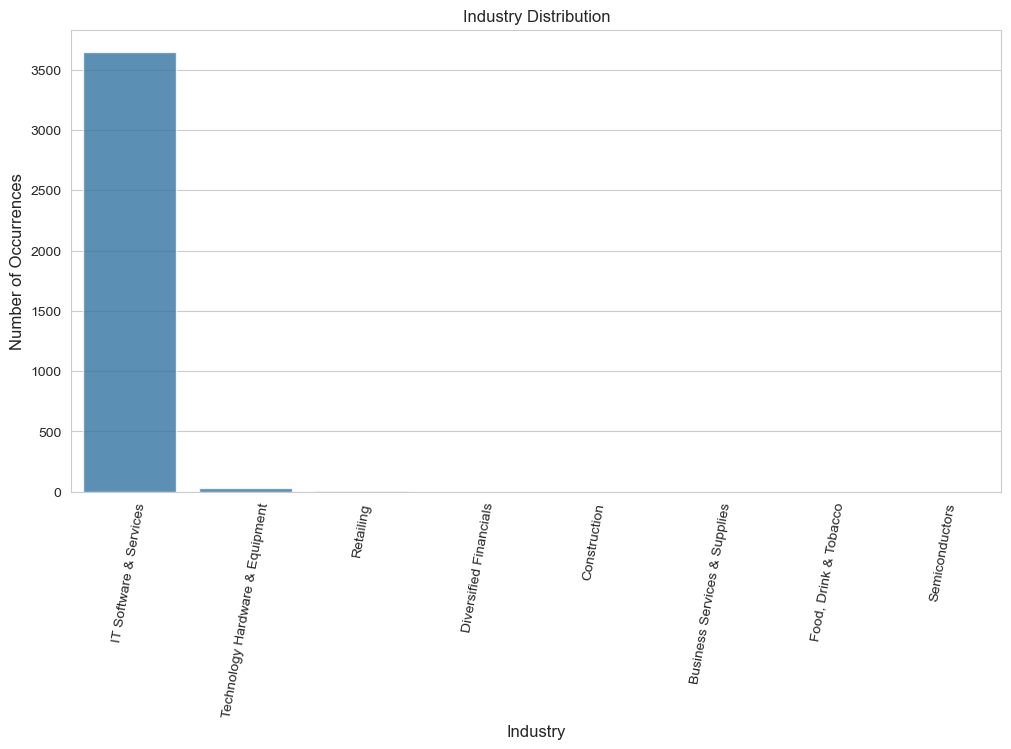

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

industry_counts = df_industry['Industry'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, alpha=0.8)
plt.title('Industry Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Industry', fontsize=12)
plt.xticks(rotation=80)  
plt.show()


In [10]:
df_industry['Industry'] = df_industry['Industry'].str.strip()

industry_group = df_industry.groupby('Industry')[['LikeCount', 'RetweetCount']].mean()
industry_group.reset_index(inplace=True)
industry_group

,Industry,LikeCount,RetweetCount
0,Business Services & Supplies,0.000000,0.000000
1,Construction,0.000000,0.000000
2,Diversified Financials,4.500000,2.000000
3,"Food, Drink & Tobacco",1.000000,1.000000
4,IT Software & Services,10.330044,1.335252
5,Retailing,0.750000,0.375000
6,Semiconductors,0.000000,0.000000
7,Technology Hardware & Equipment,0.709677,0.225806


In [11]:
mean_like_count = df['LikeCount'].mean()
mean_retweet_count = df['RetweetCount'].mean()
mean_like_count, mean_retweet_count

(4.833617490723097, 0.9874636445692508)

## Hypothesis Two
- In the dataset of tweets, those featuring specific ethics-related keywords and hashtags are observed at a lower frequency compared to those expressing enthusiasm. Furthermore, tweets with ethics-related content are anticipated to garner more likes and retweets, surpassing both the general average engagement for tweets lacking these markers and the engagement metrics of similar tweets from a prior timeframe.
     - collection of keywords: ethics_related_keywords = ['ethics', 'moral', 'justice', 'fairness', 'equity', 'rights', 'duty', 'responsibility', 'transparency', 'bias', 'accountability', 'safety', 'privacy', 'governable']
  enthusiasm_expressing_keywords = ['excited', 'enthusiastic', 'eager', 'thrilled', 'passionate', 'keen', 'animated', 'spirited', 'zealous', 'ardent', 'joyful', 'exhilarated', 'motivated', 'inspired']

source: https://www.techtarget.com/whatis/definition/AI-code-of-ethics

https://www.merriam-webster.com/thesaurus/enthusiastic


In [12]:
ethics_related_keywords = ['ethics', 'moral', 'justice', 'fairness', 'equity', 'rights', 'duty', 'responsibility', 'transparency', 'bias', 'accountability', 'safety', 'privacy', 'governable']
ethics_related_keywords_joined = '|'.join(ethics_related_keywords)
enthusiasm_expressing_keywords = ['excited', 'enthusiastic', 'eager', 'thrilled', 'passionate', 'keen', 'animated', 'spirited', 'zealous', 'ardent', 'joyful', 'exhilarated', 'motivated', 'inspired']
enthusiasm_expressing_keywords_joined = '|'.join(enthusiasm_expressing_keywords)


In [13]:
# referenced from https://stackoverflow.com/questions/32616261/filtering-pandas-dataframe-rows-by-contains-str
ethics_related_tweets = df[df['Text'].str.contains(ethics_related_keywords_joined, case=False) | df['hashtag'].str.contains('|'.join(ethics_related_keywords), case=False)]
enthusiasm_expressing_tweets = df[df['Text'].str.contains(enthusiasm_expressing_keywords_joined, case=False) | df['hashtag'].str.contains('|'.join(enthusiasm_expressing_keywords), case=False)]

In [14]:
non_ethics_non_enthusiasm_tweets = df[~df['Text'].str.contains(ethics_related_keywords_joined, case=False) & ~df['Text'].str.contains(enthusiasm_expressing_keywords_joined, case=False)]

non_likes = non_ethics_non_enthusiasm_tweets['LikeCount'].mean()
non_retweets = non_ethics_non_enthusiasm_tweets['RetweetCount'].mean()

non_likes, non_retweets

(4.858834892232615, 0.9907991053273688)

In [15]:
ethics_avg_likes = ethics_related_tweets['LikeCount'].mean()
ethics_avg_retweets = ethics_related_tweets['RetweetCount'].mean()

enthusiasm_avg_likes = enthusiasm_expressing_tweets['LikeCount'].mean()
enthusiasm_avg_retweets = enthusiasm_expressing_tweets['RetweetCount'].mean()

In [16]:
print(f"Ethics-related tweets: average likes = {ethics_avg_likes}, average retweets = {ethics_avg_retweets}")
print(f"Enthusiasm-expressing tweets: average likes = {enthusiasm_avg_likes}, average retweets = {enthusiasm_avg_retweets}")

Ethics-related tweets: average likes = 2.272727272727273, average retweets = 0.7323232323232324
Enthusiasm-expressing tweets: average likes = 4.986111111111111, average retweets = 0.7777777777777778


### Hypothesis Three
- Tweets with links to external content that cite diverse sources (published papers, authorized websites) are more likely to receive likes and retweets than those that do not cite sources.
    - By automating the external sites, look for and verify citation sources that are well-known and reliable. Then, compare the number of likes and retweets to other sites that do not have sources.

- what specific things are mentioned in the enthusiasm-expressing tweets and the most retweeted and liked tweets have external links that are related to academic publications.

- 

In [17]:
# Source: https://cs.stackexchange.com/questions/7136/where-to-find-published-research-papers
academic_sites = ["ieeexplore.ieee.org", "acm.org", "springer.com", "elsevier.com", "dblp.org", "arxiv.org", "microsoft.com", "eprint.iacr.org", "eccc.weizmann.ac.il", "journals.sagepub.com", "www.sciencedirect.com"]

In [18]:
from requests.exceptions import RequestException
import json
import os

def fetch_url_with_html_tree(url: str, max_attempts: int = 3) -> lxml.etree:
    """
    Fetches the HTML of a webpage and parses it into an lxml HTML tree.

    :param url: The URL of the webpage.
    :param max_attempts: The maximum number of attempts to fetch the webpage.
    :return: An lxml HTML tree, or None if an error occurred.
    """
    # Check if the URL is already in the JSON file
    if os.path.exists('urls.json'):
        with open('urls.json', 'r') as f:
            for line in f:
                data = json.loads(line)
                if url in data:
                    # If the URL is in the file, return the saved HTML content
                    return data[url]

    # If the URL is not in the file, fetch the webpage
    tree = None
    request_count = 0
    while tree is None:
        try:
            request_count += 1
            r = requests.get(url)
            # request_count += 1
            if r.text.strip() == "":
                print(f"Empty response from {url}. Skipping this URL.")
                return None
            content = r.text
            # Remove XML and Unicode declarations
            content = re.sub(r'^\s*<\?xml.*\?>', '', content)
            content = re.sub(r'^\s*<\?unicode.*\?>', '', content)
            tree = lxml.html.fromstring(content)        
            title = tree.xpath('//h1/span/following-sibling::text()')
            abstract = tree.xpath('//blockquote/span/following-sibling::text()')
            with open('urls.json', 'a') as f:
                json.dump({url: {"title": title, "abstract": abstract}}, f)
                f.write('\n')
        except RequestException as e:
            print(f"Error retrieving {url}. Attempt {request_count}.")
            if request_count == max_attempts:
                print(f"Failed to retrieve {url} after {max_attempts} attempts. Skipping this URL.")
                with open('urls.json', 'a') as f:
                    json.dump({url: str(e)}, f)
                    f.write('\n')
                return None
    return tree

In [19]:
# from concurrent.futures import ThreadPoolExecutor

# def find_cited_links_concurrently(urls: list) -> list:
#     """
#     Fetches the HTML of multiple webpages concurrently and finds all the cited links.
#     referenced from https://stackoverflow.com/questions/64458768/performance-difference-between-multithread-using-queue-and-futures-threadpoolexe
    
#     :param urls: A list of URLs of the webpages.
#     :return: A list of lists of cited links.
#     """
#     with ThreadPoolExecutor(max_workers=5) as executor:
#         return list(executor.map(find_cited_links, urls))

In [20]:
from urllib.parse import urlparse

def extract_the_hostname(url):
    return urlparse(url).hostname

df_outlinks = df.explode('Outlinks')
df_outlinks['hostname'] = df_outlinks['Outlinks'].apply(extract_the_hostname)
df_outlinks['hostname']

2                  us02web.zoom.us
2                      twitter.com
3                      twitter.com
5                gazetekarinca.com
6        www.fierceelectronics.com
                   ...            
49991                      swee.ps
49994                     youtu.be
49996                      lnkd.in
49996                      lnkd.in
49999                    drumup.io
Name: hostname, Length: 20981, dtype: object

In [21]:
df_outlinks['matches'] = df_outlinks['hostname'].str.contains('|'.join(academic_sites))
df_academic = df_outlinks[df_outlinks['matches'] == True]
df_academic['Outlinks']

2064                      https://arxiv.org/abs/1706.03762
2849                  https://arxiv.org/pdf/2301.04655.pdf
2887                      https://arxiv.org/abs/1706.03762
2960     https://cacm.acm.org/blogs/blog-cacm/268103-wh...
3039     https://www-sciencedirect-com.proxy.library.vc...
                               ...                        
48325    https://cacm.acm.org/blogs/blog-cacm/269050-ch...
48338    https://customervoice.microsoft.com/Pages/Resp...
48866    https://blogs.microsoft.com/blog/2023/01/23/mi...
49185                     https://arxiv.org/abs/2301.08745
49871    https://journals.sagepub.com/doi/full/10.1177/...
Name: Outlinks, Length: 91, dtype: object

In [22]:
df_academic = df_outlinks[df_outlinks['matches'] == True]
df_academic

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,hostname,matches
2064,2023-01-22 15:35:55+00:00,1617184289942011907,@alexxubyte Just take a look at the YT channel...,returncode0000,https://twitter.com/returncode0000/status/1617...,https://twitter.com/returncode0000,https://arxiv.org/abs/1706.03762,['https://t.co/IKXCHEkkiI'],0,0,...,1616835586270326785,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='alexxubyte', id=172200213, dis...",[],0,arxiv.org,True
2849,2023-01-22 16:17:21+00:00,1617194718252638208,ChatGPT is not all you need - Reviewing the pr...,adnanmasood,https://twitter.com/adnanmasood/status/1617194...,https://twitter.com/adnanmasood,https://arxiv.org/pdf/2301.04655.pdf,['https://t.co/EtSusXQAiZ'],1,0,...,1617194718252638208,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#GenerativeAI'],1,arxiv.org,True
2887,2023-01-22 16:19:38+00:00,1617195291995951104,@senyeezus Not official but the foundation for...,kreta_ceous,https://twitter.com/kreta_ceous/status/1617195...,https://twitter.com/kreta_ceous,https://arxiv.org/abs/1706.03762,"['https://t.co/m2wtmbSUYM', 'https://t.co/Fv5s...",0,0,...,1617134694939742208,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='senyeezus', id=928201772941889...",[],0,arxiv.org,True
2960,2023-01-22 16:23:18+00:00,1617196216382537728,What ChatGPT and AI-Based Program Generation M...,betterhn50,https://twitter.com/betterhn50/status/16171962...,https://twitter.com/betterhn50,https://cacm.acm.org/blogs/blog-cacm/268103-wh...,"['https://t.co/5uCawefkMS', 'https://t.co/XGqp...",0,0,...,1617196216382537728,en,"<a href=""https://help.twitter.com/en/using-twi...",NaN,NaN,NaN,[],0,cacm.acm.org,True
3039,2023-01-22 16:28:00+00:00,1617197396290576384,@ChatGPT was cited as a co-author in this peer...,DavidDentRx,https://twitter.com/DavidDentRx/status/1617197...,https://twitter.com/DavidDentRx,https://www-sciencedirect-com.proxy.library.vc...,['https://t.co/tDMIudASDE'],0,0,...,1617197396290576384,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='ChatGPT', id=15981842566262988...",[],0,www-sciencedirect-com.proxy.library.vcu.edu,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48325,2023-01-24 05:35:26+00:00,1617757950939889665,ChatGPT in Computer Science Education #Artific...,PMProuk,https://twitter.com/PMProuk/status/16177579509...,https://twitter.com/PMProuk,https://cacm.acm.org/blogs/blog-cacm/269050-ch...,['https://t.co/mWBFnVUe4Y'],0,0,...,1617757950939889665,en,"<a href=""http://twinybots.com"" rel=""nofollow"">...",NaN,NaN,NaN,"['#ArtificialIntelligence', '#education']",2,cacm.acm.org,True
48338,2023-01-24 05:35:59+00:00,1617758087498326016,📢Get started with Azure 🤖ChatGPT by signing up...,rorypreddy,https://twitter.com/rorypreddy/status/16177580...,https://twitter.com/rorypreddy,https://customervoice.microsoft.com/Pages/Resp...,['https://t.co/Grxjouy51g'],0,0,...,1617758087498326016,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#microsoft', '#azure', '#chatgpt', '#cloud']",4,customervoice.microsoft.com,True
48866,2023-01-24 06:04:33+00:00,1617765278758367232,Big news affecting #ChatGPT #DALLE &amp; @GitH...,DigitalColmer,https://twitter.com/DigitalColmer/status/16177...,https://twitter.com/DigitalColmer,https://blogs.microsoft.com/blog/2023/01/23/mi...,['https://t.co/vdh4W8K1Eg'],0,1,...,1617765278758367232,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='github', id=13334762, displayn...","['#ChatGPT', '#DALLE', '#CoPilot....@Microsoft...",10,blogs.microsoft.com,True
49185,2023-01-24 06:20:06+00:00,1617769189581914112,[2301.08745] Is ChatGPT A Go

In [23]:
df_academic['Outlinks'].apply(fetch_url_with_html_tree)

2064     {'title': ['Attention Is All You Need'], 'abst...
2849                         {'title': [], 'abstract': []}
2887     {'title': ['Attention Is All You Need'], 'abst...
2960                         {'title': [], 'abstract': []}
3039     [[[], [], [], [], [], [], []], [[], [<Element ...
                               ...                        
48325                        {'title': [], 'abstract': []}
48338                        {'title': [], 'abstract': []}
48866                        {'title': [], 'abstract': []}
49185    {'title': ['Is ChatGPT A Good Translator? Yes ...
49871    [[[], [], [], [], [], [], []], [[<Element div ...
Name: Outlinks, Length: 91, dtype: object

In [24]:
# Define the keywords
keywords = ['chatgpt', 'model', 'human']

# Initialize an empty list to store the data
data = []

# Read the JSON file line by line
with open('urls.json', 'r') as f:
    for line in f:
        # Parse each line as a separate JSON object
        json_obj = json.loads(line)
        for url, info in json_obj.items():
            data.append([url, info.get('title', ''), info.get('abstract', '')])

df_extracted_academic = pd.DataFrame(data, columns=['url', 'title', 'abstract'])

df_extracted_academic


,url,title,abstract
0,https://arxiv.org/abs/1706.03762,[Attention Is All You Need],[The dominant sequence transduction models are...
1,https://arxiv.org/pdf/2301.04655.pdf,[],[]
2,https://cacm.acm.org/blogs/blog-cacm/268103-wh...,[],[]
3,https://cacm.acm.org/news/268971-chatgpt-stole...,[],[]
4,https://arxiv.org/abs/2212.10496,[Precise Zero-Shot Dense Retrieval without Rel...,[While dense retrieval has been shown effectiv...
5,https://arxiv.org/abs/2301.07597,[How Close is ChatGPT to Human Experts? Compar...,[The introduction of ChatGPT has garnered wide...
6,https://techcommunity.microsoft.com/t5/microso...,[\n\t\t],[]
7,https://azure.microsoft.com/en-us/blog/general...,[],[]
8,https://arxiv.org/pdf/2301.08653.pdf,[],[]
9,https://events.teams.microsoft.com/event/54ce5...,[],[]


In [25]:
df_merged = pd.merge(df_academic, df_extracted_academic, left_on='Outlinks', right_on='url', how='inner')

keywords = ['chatgpt', 'model', 'human']

# Convert the lists in 'title' and 'abstract' to strings
#source: https://stackoverflow.com/questions/45306988/column-of-lists-convert-list-to-string-as-a-new-column
df_merged['title'] = [','.join(map(str, l)) for l in df_merged['title']]
df_merged['abstract'] = [','.join(map(str, l)) for l in df_merged['abstract']]

df_merged['title_abstract'] = df_merged['title'] + ' ' + df_merged['abstract']

df_merged_keywords = df_merged[df_merged['title_abstract'].str.contains('|'.join(keywords), case=False)]

avg_retweets_keywords = df_merged_keywords['RetweetCount'].mean()
avg_likes_keywords = df_merged_keywords['LikeCount'].mean()

avg_retweets_all = df_merged['RetweetCount'].mean()
avg_likes_all = df_merged['LikeCount'].mean()
df_merged_non_keywords = df_merged[~df_merged['title_abstract'].str.contains('|'.join(keywords), case=False)]

avg_retweets_non_keywords = df_merged_non_keywords['RetweetCount'].mean()
avg_likes_non_keywords = df_merged_non_keywords['LikeCount'].mean()

print(f"Tweets without keywords: average retweets = {avg_retweets_non_keywords}, average likes = {avg_likes_non_keywords}")
print(f"Tweets with keywords: average retweets = {avg_retweets_keywords}, average likes = {avg_likes_keywords}")
print(f"All tweets: average retweets = {avg_retweets_all}, average likes = {avg_likes_all}")

Tweets without keywords: average retweets = 0.8873239436619719, average likes = 3.676056338028169
Tweets with keywords: average retweets = 1.3, average likes = 5.8
All tweets: average retweets = 0.978021978021978, average likes = 4.142857142857143


In [26]:
import json

titles = []
abstracts = []
with open('urls.json','r') as urls:
    for line in urls:
        data = json.loads(line)
        for url in data:
            if 'title' in data[url] and len(data[url]['title']) >= 1:
                titles.append(data[url]['title'][0])
            if 'abstract' in data[url] and len(data[url]['abstract']) >= 1:
                abstracts.append(data[url]['abstract'][0])

all_str = ''.join(titles)


In [29]:
from collections import Counter
import pandas as pd

pd.set_option('display.max_rows', None)

# Split each string in h1_list into words and flatten the list
words = [word for string in h1_list for word in string.split()]

# Count the frequency of each word
word_counts = Counter(words)

# Convert the Counter object to a DataFrame and sort by frequency
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency'])
df_word_counts = df_word_counts.sort_values('Frequency', ascending=False)

df_word_counts

,Frequency
e,97
o,75
a,73
t,69
n,63
i,54
r,42
s,40
l,38
h,29


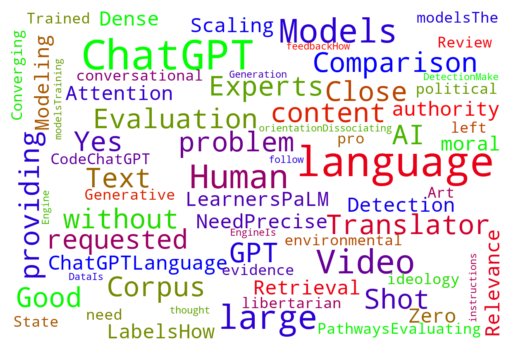

<Figure size 640x480 with 0 Axes>

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# source: https://www.datacamp.com/tutorial/wordcloud-python
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white", width=600, height=400, scale=2, colormap='brg').generate(h1_str)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("wordcloud.png")


In [ ]:
from urllib.parse import urlparse

def is_academic(url):
    if url is None:
        return False
    domain = urlparse(url).hostname
    if domain is None:
        return False
    for site in cs_academic_sites:
        if site in domain:
            return domain
    return False

In [ ]:
# def process_links(links):
#     if not links:
#         return 'N/A'
#     results = []
#     for link in links:
#         cited_links = find_cited_links(link)
#         results.extend([is_academic(cited_link) for cited_link in cited_links])
#     return results

# enthusiasm_expressing_tweets['is_academic'] = enthusiasm_expressing_tweets['Outlinks'].apply(lambda x: process_links(x) if process_links(x) else 'N/A')


In [ ]:
enthusiasm_expressing_tweets['Outlinks']

# write tests